In [1]:
import numpy as np
import pandas as pd

import logistic_regression
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.special import expit as sigmoid
n = 1000

a = 10

# Generate y observations from the binomial distribution
y = np.random.binomial(1, 0.5, size=n)

true_beta = np.array([5, 3])

X = np.random.normal(size = (n, 2))

y = np.random.binomial(1, sigmoid(X @ true_beta))

np.mean(y)

0.483

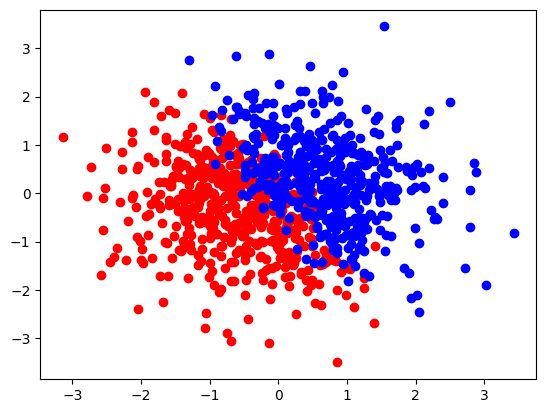

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'b')

In [4]:
lr = logistic_regression.LogisticRegressor()

lr.fit(X, y)

print(lr.beta)

print("minus log likelihood: ", lr.minus_log_likelihood(X, y))
X_model = lr.create_data_frame(X)

db = logistic_regression.LogisticRegressor.loss_prime(X_model, y, lr.beta)
print("db: ", db)

lr.beta = lr.beta - 0.001 * db
print("minus log likelihood: ", lr.minus_log_likelihood(X, y))

[-0.13625018  5.46484171  3.28481483]
minus log likelihood:  201.6999892961495
db:  intercept    0.006229
0           -0.747045
1            1.231618
dtype: float64
minus log likelihood:  201.69798155908762


visualisation of loglikehood loss

In [11]:
lr = logistic_regression.LogisticRegressor()
lr.fit(X, y, max_num_epoch=1)

db = logistic_regression.LogisticRegressor.loss_prime(X_model, y, lr.beta)


k = 1000
x1 = np.linspace(-10, 10, k)
x2 = np.linspace(-10, 10, k)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(k): 
    for j in range(k):
        beta = np.array([X1[i, j], X2[i, j]])
        weighted_input = X @ beta
        Z[i, j] = np.sum(y * weighted_input - np.log(1 + np.exp(weighted_input)))

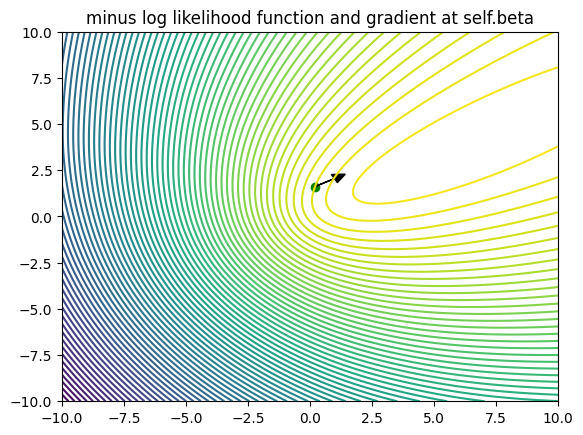

In [12]:

plt.contour(X1, X2, Z, 100)
# add dot for self.beta
plt.scatter(lr.beta[0], lr.beta[1], c = 'g')
# draw arrow for gradient
plt.arrow(lr.beta[0], lr.beta[1], -0.01 * db[0], -0.01 * db[1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.title("minus log likelihood function and gradient at self.beta")
plt.show()

In [10]:
lr.fit(X, y, max_num_epoch=1000)

lr.accuracy(X, y)

0.904

In [7]:

print(lr.beta)

print("log likelihood: ", lr.minus_log_likelihood(X, y))

X_model = lr.create_data_frame(X)

db = logistic_regression.LogisticRegressor.loss_prime(X_model, y, lr.beta)
print("db: ", db)

lr.beta = lr.beta - 0.001 * db
print("log likelihood: ", lr.minus_log_likelihood(X, y))

intercept   -0.107940
0            5.259708
1            3.108444
dtype: float64
log likelihood:  204.42021192706824
db:  intercept    0.162028
0            0.094531
1           -0.144130
dtype: float64
log likelihood:  204.42015787306843


In [8]:
lr.fit(X,y, max_num_epoch=500, learning_rate=0.001)
print(lr.beta)
y_hat = lr.predict(X)
print("Accuracy for gd and training data: ", lr.accuracy(X, y))

[-0.1081903   5.09741427  3.01618725]
Accuracy for gd and training data:  0.917


In [11]:
lr = logistic_regression.LogisticRegressor(descent_algorithm = "adam")
lr.fit(X,y, max_num_epoch=100, learning_rate=0.001, verbose=True)
print("Accuracy for adam algorithm and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [0.71514234 0.10830128]
Epoch 1, solution: [1.2264904  0.48376446]
Epoch 2, solution: [1.62444341 0.79128789]
Epoch 3, solution: [1.9515316  1.02858384]
Epoch 4, solution: [2.21831928 1.21353939]
Epoch 5, solution: [2.45014523 1.37004067]
Epoch 6, solution: [2.6401784  1.50982592]
Epoch 7, solution: [2.80753469 1.63070311]
Epoch 8, solution: [2.95693252 1.73096762]
Epoch 9, solution: [3.09749138 1.81671564]
Epoch 10, solution: [3.21494152 1.89326644]
Epoch 11, solution: [3.32007743 1.97101011]
Epoch 12, solution: [3.42044235 2.03355596]
Epoch 13, solution: [3.51066201 2.08976602]
Epoch 14, solution: [3.60200443 2.14644312]
Epoch 15, solution: [3.68487861 2.19259892]
Epoch 16, solution: [3.75618899 2.23860338]
Epoch 17, solution: [3.82510313 2.2803029 ]
Epoch 18, solution: [3.88310759 2.3218123 ]
Epoch 19, solution: [3.94096803 2.35763626]
Epoch 20, solution: [3.99059681 2.3903049 ]
Epoch 21, solution: [4.04463256 2.42152117]
Epoch 22, solution: [4.09702389 2.45196819

In [12]:
lr = logistic_regression.LogisticRegressor(descent_algorithm = "iwls")
lr.fit(X,y, max_num_epoch=10, batch_size=32, learning_rate=0.001, verbose=True)
print("Accuracy for iwls and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [1.42444238 0.81437928]
Epoch 1, solution: [2.5074966  1.50804914]
Epoch 2, solution: [3.63644052 2.19648832]
Epoch 3, solution: [4.50111716 2.71717925]
Epoch 4, solution: [4.83913305 2.91996937]
Epoch 5, solution: [4.87554213 2.94177722]
Epoch 6, solution: [4.87590551 2.94199464]
Epoch 7, solution: [4.87590554 2.94199466]
Epoch 8, solution: [4.87590554 2.94199466]
Epoch 9, solution: [4.87590554 2.94199466]
Accuracy for iwls and training data:  0.904


In [12]:
lr = logistic_regression.LogisticRegressor(descent_algorithm = "newton")
lr.fit(X,y, max_num_epoch=10, batch_size=32, learning_rate=0.001, verbose=True)
print("Accuracy for newton and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [2.65859355 0.42865723]
Epoch 1, solution: [3.14274267 1.64597823]
Epoch 2, solution: [4.16790467 2.42445395]
Epoch 3, solution: [4.85849666 2.89883403]
Epoch 4, solution: [5.05539593 3.02783775]
Epoch 5, solution: [5.06707278 3.0352602 ]
Epoch 6, solution: [5.06710989 3.03528324]
Epoch 7, solution: [5.06710989 3.03528324]
Epoch 8, solution: [5.06710989 3.03528324]
Epoch 9, solution: [5.06710989 3.03528324]
Accuracy for newton and training data:  0.917


In [25]:
lr = logistic_regression.LogisticRegressor(descent_algorithm = "sgd")
lr.fit(X,y, max_num_epoch=10, batch_size=32, learning_rate=0.001, verbose=True)
print("Accuracy for newton and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [ 2.1322419  -0.97114541]
Epoch 1, solution: [ 2.15555448 -0.66190608]
Epoch 2, solution: [ 2.17109184 -0.38837071]
Epoch 3, solution: [ 2.18220973 -0.14931477]
Epoch 4, solution: [2.19200416 0.05722609]
Epoch 5, solution: [2.20217877 0.23541503]
Epoch 6, solution: [2.21386868 0.38845046]
Epoch 7, solution: [2.2279149  0.51948871]
Epoch 8, solution: [2.2438732  0.63401512]
Epoch 9, solution: [2.26193512 0.73330056]
Accuracy for newton and training data:  0.882


# Interactions

In [31]:
lr = logistic_regression.LogisticRegressor(
    descent_algorithm="sgd", include_interactions=True
)

X = pd.DataFrame(X)
lr.fit(X, y, max_num_epoch=10, batch_size=32, learning_rate=0.001, verbose=True)
print("Accuracy for newton and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [ 1.41804849  0.11090295 -1.12175331]
Epoch 1, solution: [ 1.52508796  0.26820695 -1.00056744]
Epoch 2, solution: [ 1.61418132  0.40038538 -0.90042722]
Epoch 3, solution: [ 1.69147762  0.5129245  -0.81620083]
Epoch 4, solution: [ 1.75936398  0.61113819 -0.74503124]
Epoch 5, solution: [ 1.82077792  0.69642925 -0.68388712]
Epoch 6, solution: [ 1.87704046  0.77241029 -0.63037406]
Epoch 7, solution: [ 1.92932098  0.84071635 -0.58318975]
Epoch 8, solution: [ 1.97881154  0.90146993 -0.54109356]
Epoch 9, solution: [ 2.02651009  0.95570206 -0.50262384]
Accuracy for newton and training data:  0.889


In [40]:
lr = logistic_regression.LogisticRegressor(
    descent_algorithm="adam", include_interactions=True
)

X = pd.DataFrame(X)
lr.fit(X, y, max_num_epoch=10, batch_size=32, learning_rate=0.001, verbose=True)
print("Accuracy for newton and training data: ", lr.accuracy(X, y))

Epoch 0, solution: [-0.61183877  1.55670494  0.26276743]
Epoch 1, solution: [-0.00812227  1.40886822  0.19470049]
Epoch 2, solution: [0.57943262 1.26189505 0.12217742]
Epoch 3, solution: [1.10975899 1.1721731  0.0600227 ]
Epoch 4, solution: [1.57559622 1.16736763 0.00484306]
Epoch 5, solution: [ 1.94610772  1.21566988 -0.02955593]
Epoch 6, solution: [ 2.22903897  1.29534008 -0.05138262]
Epoch 7, solution: [ 2.45170291  1.37481568 -0.06893193]
Epoch 8, solution: [ 2.63077283  1.45811978 -0.07393633]
Epoch 9, solution: [ 2.78832336  1.53826164 -0.08658559]
Accuracy for newton and training data:  0.901
